# COSC 522 project 3
# Yangsong Gu
### Oct 08, 2021

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time

from sympy import lambdify
from sympy import Symbol, symbols, simplify
import sympy

In [1]:
def load_data(f):
    '''
    read data, note that the last column is label. Note this function only separately load the data, not includes normailization
    args:  f --> the path or website of data

    return: X --> features
            y --> label
    '''
    data = pd.read_csv(f, delim_whitespace = True, header = 0)

    if 'pima' in f:
        data = data.replace({'No': 1, 'Yes':0})
    else:
        data = data
        
    X = data.iloc[:,:-1]
    y = data.iloc[:,-1].astype(int)


    return X, y

In [3]:
# read and relabel the class

pi_tr_pth = 'http://www.stats.ox.ac.uk/pub/PRNN/pima.tr'
pi_te_pth = 'http://www.stats.ox.ac.uk/pub/PRNN/pima.te'
Xtrain_pi, ytrain_pi = load_data(pi_tr_pth)
Xtest_pi, ytest_pi = load_data(pi_te_pth) 

In [54]:
# standardize the data to make the features comparable or with the same scale
f_mean = Xtrain_pi.mean(axis = 0)
f_std  = Xtrain_pi.std(axis = 0)
Xtrain_pi = (Xtrain_pi - f_mean)/f_std
# standard normalization for training set
Xtest_pi= (Xtest_pi - f_mean)/f_std
ntrain = Xtrain_pi.shape[0]; ntest = Xtest_pi.shape[0]
nfe = Xtrain_pi.shape[1]
print(ntrain, nfe)
print("Training sample size {}, test sample size {}".format(Xtrain_pi.shape, Xtest_pi.shape))

200 7
Training sample size (200, 7), test sample size (332, 7)


In [55]:
def FLD(class0, class1, nfe):
    
    mu0 = class0.mean(axis = 0).reshape(nfe, 1)
    mu1 = class1.mean(axis = 0).reshape(nfe, 1)

    Sb_mtx = (mu0 - mu1) @ (mu0 - mu1).T  # between class scatter matrix
    
    Sw_mtx = ((class0 - mu0.T ).T @ (class0 - mu0.T)) + \
             ((class1 - mu1.T ).T @ (class1 - mu1.T))
    Sw_mtx = Sw_mtx.reshape(nfe, nfe)     #within class scatter matrix
    
    
    w = np.linalg.inv(Sw_mtx) @ (mu0 - mu1)  # projection vector
    
    return w 

In [56]:
# FLD algorithm
class0 = Xtrain_pi[ytrain_pi == 0].to_numpy()
class1 = Xtrain_pi[ytrain_pi == 1].to_numpy()

In [57]:
mu0 = class0.mean(axis = 0).reshape(nfe, 1)
mu1 = class1.mean(axis = 0).reshape(nfe, 1)
mu0.shape, mu1

((7, 1),
 array([[-0.1940824 ],
        [-0.34306572],
        [-0.1493558 ],
        [-0.17147328],
        [-0.20158481],
        [-0.14738441],
        [-0.26196239]]))

In [58]:
Sb_mtx = (mu0 - mu1) @ (mu0 - mu1).T

In [59]:
Sw_mtx = ((class0 - mu0.T ).T @ (class0 - mu0.T)) + \
         ((class1 - mu1.T ).T @ (class1 - mu1.T))
Sw_mtx = Sw_mtx.reshape(nfe, nfe)
Sw_mtx

array([[184.37596136,   8.08452917,  38.90624984,   8.78035461,
         -3.58046658, -34.88043799,  99.44677823],
       [  8.08452917, 153.30700184,  33.71414988,  20.46314383,
         16.29205909,  -7.54884868,  33.44715569],
       [ 38.90624984,  33.71414988, 190.33957487,  42.78481844,
         35.83651336, -17.9786289 ,  62.6336577 ],
       [  8.78035461,  20.46314383,  42.78481844, 187.58468495,
        117.72819049,   9.17346493,  32.69386707],
       [ -3.58046658,  16.29205909,  35.83651336, 117.72819049,
        183.22350192,  26.38493218,   5.75020391],
       [-34.88043799,  -7.54884868, -17.9786289 ,   9.17346493,
         26.38493218, 190.56668952, -29.19996251],
       [ 99.44677823,  33.44715569,  62.6336577 ,  32.69386707,
          5.75020391, -29.19996251, 172.35762708]])

In [60]:
w = np.linalg.inv(Sw_mtx) @ (mu0 - mu1)
w

array([[ 2.05332385e-03],
       [ 5.83898601e-03],
       [-1.59650179e-04],
       [-7.48221299e-05],
       [ 2.32771503e-03],
       [ 2.95374008e-03],
       [ 2.64736567e-03]])

In [61]:
w = FLD(class0, class1, nfe)
w

array([[ 2.05332385e-03],
       [ 5.83898601e-03],
       [-1.59650179e-04],
       [-7.48221299e-05],
       [ 2.32771503e-03],
       [ 2.95374008e-03],
       [ 2.64736567e-03]])

In [12]:
# training sample on project vector
fXtr = w.T @ Xtrain_pi.to_numpy().T   # projection on X
fXtr = fXtr.reshape(ntrain, 1)

In [13]:
# test sample on project vector
fX = w.T @ Xtest_pi.to_numpy().T   # projection on X
fX = fX.reshape(ntest, 1)

In [25]:
eigvector_te

array([[ 0.23824647,  0.57268811,  0.13685027,  0.38993405, -0.16254856,
         0.56866442, -0.30771599],
       [ 0.33048405,  0.00519075, -0.16589171,  0.02139677,  0.91972606,
         0.09882055, -0.08434423],
       [ 0.45463374,  0.07263412,  0.40443143, -0.76363214, -0.09356672,
         0.04078674, -0.17582752],
       [ 0.3357816 , -0.2590656 ,  0.02784219,  0.33069184, -0.12794062,
        -0.50724738, -0.66055639],
       [ 0.56198278, -0.52982657,  0.11249456,  0.27511307, -0.17331114,
         0.27915638,  0.45513942],
       [ 0.30819309,  0.11509554, -0.87449985, -0.22989404, -0.26929063,
         0.03704086, -0.01671238],
       [ 0.32213375,  0.55285396,  0.10957623,  0.16267761,  0.00205477,
        -0.57322901,  0.47277443]])

In [26]:
np.argmax(eigvalue_te)
np.argmax(eigvalue_te)

0

In [40]:
#### PCA on test set
X_cov = np.cov(Xtest_pi.to_numpy().T)
eigvalue_te, eigvector_te = np.linalg.eig(X_cov)
idx = np.argsort(-eigvalue_te)   # from largest to the smallest
print(eigvalue_te)
major_eigvalue_te = eigvalue_te[idx[0]]  
print('id',idx[0])
major_vector_te = eigvector_te[:, np.argmax(eigvalue_te)]
print('test set major eigvalue', major_eigvalue_te, 'eigen vector', major_vector_te)

error_rate_te = 1- major_eigvalue_te/(eigvalue_te.sum())
print("test set, error rate is {:.2%}".format(error_rate_te))

## PCA on training set
X_cov = np.cov(Xtrain_pi.to_numpy().T)
eigvalue_tr, eigvector_tr = np.linalg.eig(X_cov)
idx = np.argsort(-eigvalue_tr)   # from largest to the smallest
print('rank',idx)
major_eigvalue_tr = eigvalue_tr[idx[0]]   
major_vector_tr = eigvector_tr[:, np.argmax(eigvalue_tr)]
print('training set major eigvalue',major_eigvalue_tr, 'eigen vector', major_vector_tr)
error_rate_tr = 1- major_eigvalue_tr/(eigvalue_tr.sum())
print("training set, error rate is {:.2%}".format(error_rate_tr))

# pX1 = major_vector_te @ Xtest_pi.to_numpy().T
# pX1 = pX1.reshape(ntest, 1)
pX1 = Xtest_pi.to_numpy() @ major_vector_te.T
pX1 = pX1.reshape(ntest, 1)
print(px11.shape)

# pX1tr = major_vector_tr @ Xtrain_pi.to_numpy().T
# pX1tr = pX1tr.reshape(ntrain, 1)
pX1tr = Xtrain_pi.to_numpy() @ major_vector_tr.T
pX1tr = pX1tr.reshape(ntrain, 1)


[2.46801046 1.58939404 1.3671781  0.83161713 0.72732959 0.28014007
 0.29869929]
id 0
test set major eigvalue 2.4680104627028636 eigen vector [0.23824647 0.33048405 0.45463374 0.3357816  0.56198278 0.30819309
 0.32213375]
test set, error rate is 67.36%
rank [0 1 6 5 4 3 2]
training set major eigvalue 2.4092611707150846 eigen vector [-0.36549332 -0.36600186 -0.41257275 -0.43153727 -0.39121306 -0.02913468
 -0.47129619]
training set, error rate is 65.58%
(332,)


In [45]:
pX.shape

(332, 4)

In [46]:
idx 

# training set
pct = [1- eigvalue_tr[:x].sum()/eigvalue_tr.sum() for x in range(1,nfe+1)]
target_rate = 0.15
candidate_removal = [x for x in pct if x <= target_rate]
number_components = nfe - len(candidate_removal)

print("Training set:\n We need to keep {:d} features".format(number_components),' to make sure we have a at-most {:.2%} error rate'.format(target_rate))


# test set
pct = [1- eigvalue_te[:x].sum()/eigvalue_te.sum() for x in range(1,nfe+1)]
target_rate = 0.15
candidate_removal = [x for x in pct if x <= target_rate]
number_components = nfe - len(candidate_removal)

print("test set:\n We need to keep {:d} features".format(number_components),' to make sure we have a at-most {:.2%} error rate'.format(target_rate))


pX = Xtest_pi.to_numpy() @ eigvector_te[:, idx[:number_components]]      # project test sample
pXtr = Xtrain_pi.to_numpy() @ eigvector_tr[:, idx[:number_components]]   # project training sample



Training set:
 We need to keep 5 features  to make sure we have a at-most 15.00% error rate
test set:
 We need to keep 4 features  to make sure we have a at-most 15.00% error rate


In [47]:
%matplotlib qt
fig, axs = plt.subplots(1,2)
axs[0].hist(fXtr,bins = 20)
axs[0].set_xlabel('fX from FLD')
axs[0].axvline(x= 0, color = 'red', linestyle = ':')
axs[1].hist(pX1tr, bins = 20)
axs[1].set_xlabel('pX1 from PCA')
axs[1].axvline(x=0, color = 'red', linestyle = ':')


In [48]:
import sys
sys.path.append(r'C:\2021-2022-Fall-semester\EECS522\Project')

In [49]:

from mlclass import mpp, knn, unsupervised_learning 
from mlclass import performance
%load_ext autoreload
%autoreload 2


### Case 3

- nX

In [50]:
pw = [1/4, 3/4]   # prior probability
MPP = mpp(Xtrain_pi, ytrain_pi, Xtest_pi, ytest_pi)
y, tt = MPP.case3(pw)
acc_overall, acc0, acc1 = MPP.model_evaluation(y)
print('run time: {:.4f} seconds'.format(tt))

Overall accuracy: 76.81% 
 Classwise accuracy of class 0: 54.13% 
 Classwise accuracy of class 1: 87.89% 

run time: 0.0534 seconds


- fX

In [51]:
pw = [1/4, 3/4]   # prior probability
MPP = mpp(fXtr, ytrain_pi, fX, ytest_pi)
y, tt = MPP.case3(pw)
acc_overall, acc0, acc1 = MPP.model_evaluation(y)
print('run time: {:.4f} seconds'.format(tt))

Overall accuracy: 80.42% 
 Classwise accuracy of class 0: 54.13% 
 Classwise accuracy of class 1: 93.27% 

run time: 0.0065 seconds


* pX1

In [52]:
pw = [1/4, 3/4]   # prior probability
MPP = mpp(pX1tr, ytrain_pi, pX1, ytest_pi)
y, tt = MPP.case3(pw)
acc_overall, acc0, acc1 = MPP.model_evaluation(y)
print('run time: {:.4f} seconds'.format(tt))

Overall accuracy: 50.60% 
 Classwise accuracy of class 0: 0.92% 
 Classwise accuracy of class 1: 74.89% 

run time: 0.0050 seconds


* pX

In [53]:
pw = [1/4, 3/4]   # prior probability
MPP = mpp(pXtr, ytrain_pi, pX, ytest_pi)
y, tt = MPP.case3(pw)
acc_overall, acc0, acc1 = MPP.model_evaluation(y)
print('run time: {:.4f} seconds'.format(tt))

Overall accuracy: 58.43% 
 Classwise accuracy of class 0: 0.00% 
 Classwise accuracy of class 1: 87.00% 

run time: 0.0441 seconds


* knn

In [29]:
KNN = knn('pima',0, 30)  #kmin = 0, kmax = 30, dataname = 'pima'  just initialization
k = 12 

fX = pd.DataFrame(fX, columns = ['D1'])  # convert test sample projection to dataframe
fXtr = pd.DataFrame(fXtr, columns = ['D1'])  # convert training sample projection to dataframe

pX1 = pd.DataFrame(pX1, columns =['D1'] )
pX1tr = pd.DataFrame(pX1tr, columns=['D1'])

pX = pd.DataFrame(pX, columns = ['D{}'.format(x) for x in range(pX.shape[1])])
pXtr = pd.DataFrame(pXtr, columns = ['D{}'.format(x) for x in range(pX.shape[1])])

pima


In [30]:
#=========================== nX ===================================================
y_nx, tt_nx, acc_all_nx, acc_class_nx = KNN.predict(k, Xtest_pi, ytest_pi, Xtrain_pi, ytrain_pi)
print('Knn applied on nX:\n',acc_all_nx, acc_class_nx, 'run time:',tt_nx)
#=========================== fX ===================================================
y_fx, tt_fx, acc_all_fx, acc_class_fx = KNN.predict(k, fX, ytest_pi, fXtr, ytrain_pi)
print('Knn applied on fX:\n', acc_all_fx, acc_class_fx, 'run time:',tt_fx)
#=========================== pX1 ===================================================
y_px1, tt_px1, acc_all_px1, acc_class_px1 = KNN.predict(k, pX1, ytest_pi, pX1tr, ytrain_pi)
print('Knn applied on pX1:\n',acc_all_px1, acc_class_px1,'run time:',tt_px1)
#=========================== pX ===================================================
y_px, tt_px, acc_all_px, acc_class_px = KNN.predict(k, pX, ytest_pi, pXtr, ytrain_pi)
print('Knn applied on pX:\n', acc_all_px, acc_class_px,'run time:',tt_px)

Knn applied on nX:
 0.7801204819277109    category  cate_size  class_acc
0         0        109   0.577982
1         1        223   0.878924 run time: 4.231682300567627
Knn applied on fX:
 0.7801204819277109    category  cate_size  class_acc
0         0        109   0.642202
1         1        223   0.847534 run time: 2.268929958343506
Knn applied on pX1:
 0.4427710843373494    category  cate_size  class_acc
0         0        109   0.155963
1         1        223   0.582960 run time: 2.6289687156677246
Knn applied on pX:
 0.4457831325301205    category  cate_size  class_acc
0         0        109   0.082569
1         1        223   0.623318 run time: 3.0917298793792725


In [34]:
Eva = performance(y_nx, ytest_pi)
con_nx = Eva.confusion_matrix()
print('nX:\n', con_nx)
Eva = performance(y_fx, ytest_pi)
con_fx = Eva.confusion_matrix()
print('nX:\n', con_fx)
Eva = performance(y_px1, ytest_pi)
con_px1 = Eva.confusion_matrix()
print('nX:\n', con_px1)
Eva = performance(y_px, ytest_pi)
con_px = Eva.confusion_matrix()
print('nX:\n', con_px)

nX:
 (    0    1
0  63   46
1  27  196, [0.8789237668161435, 0.1210762331838565, 0.5779816513761468, 0.42201834862385323])
nX:
 (    0    1
0  70   39
1  34  189, [0.8475336322869955, 0.15246636771300448, 0.6422018348623854, 0.3577981651376147])
nX:
 (    0    1
0  66   43
1  41  182, [0.8161434977578476, 0.18385650224215247, 0.6055045871559633, 0.3944954128440367])
nX:
 (    0    1
0  62   47
1  41  182, [0.8161434977578476, 0.18385650224215247, 0.5688073394495413, 0.43119266055045874])


* Case 3

In [35]:
pw = [1/4, 3/4]   # prior probability

In [34]:
#=========================== nX ===================================================
print('===============================')
print('case 3 applied on nX:\n')
MPP = mpp(Xtrain_pi, ytrain_pi, Xtest_pi, ytest_pi)
y_nx, tt_nx = MPP.case3(pw)
acc_all_nx, acc0_nx, acc1_nx = MPP.model_evaluation(y_nx)
print('run time {:.4f}'.format(tt_nx))
#=========================== fX ===================================================
print('===============================')
print('case 3 applied on fX:\n')
MPP = mpp(fXtr, ytrain_pi, fX, ytest_pi)
y_fx, tt_fx = MPP.case3(pw)
acc_all_fx, acc0_fx, acc1_fx = MPP.model_evaluation(y_fx)
print('run time {:.4f}'.format(tt_fx))
#=========================== pX1 ===================================================
print('===============================')
print('case 3 applied on pX1:\n')
MPP = mpp(pX1tr, ytrain_pi, pX1, ytest_pi)
y_px1, tt_px1 = MPP.case3(pw)
acc_all_px1, acc0_px1, acc1_px1 = MPP.model_evaluation(y_px1)
print('run time {:.4f}'.format(tt_px1))
#=========================== pX ===================================================
print('===============================')
print('case 3 applied on pX1:\n')
MPP = mpp(pXtr, ytrain_pi, pX, ytest_pi)
y_px, tt_px = MPP.case3(pw)
acc_all_px, acc0_px, acc1_px = MPP.model_evaluation(y_px)
print('run time {:.4f}'.format(tt_px))


case 3 applied on nX:

Overall accuracy: 76.81% 
 Classwise accuracy of class 0: 54.13% 
 Classwise accuracy of class 1: 87.89% 

run time 0.0748
case 3 applied on fX:

Overall accuracy: 80.42% 
 Classwise accuracy of class 0: 54.13% 
 Classwise accuracy of class 1: 93.27% 

run time 0.0050
case 3 applied on pX1:

Overall accuracy: 50.60% 
 Classwise accuracy of class 0: 0.92% 
 Classwise accuracy of class 1: 74.89% 

run time 0.0050
case 3 applied on pX1:

Overall accuracy: 58.43% 
 Classwise accuracy of class 0: 0.00% 
 Classwise accuracy of class 1: 87.00% 

run time 0.0359


In [37]:
Eva = performance(y_nx, ytest_pi)
con_nx, roc_nx = Eva.confusion_matrix()
print('nX:\n', con_nx)
Eva = performance(y_fx, ytest_pi)
con_fx,roc_fx = Eva.confusion_matrix()
print('nX:\n', con_fx)
Eva = performance(y_px1, ytest_pi)
con_px1,roc_px1 = Eva.confusion_matrix()
print('nX:\n', con_px1)
Eva = performance(y_px, ytest_pi)
con_px, roc_px = Eva.confusion_matrix()
print('nX:\n', con_px)

nX:
     0    1
0  59   50
1  27  196
nX:
     0    1
0  59   50
1  15  208
nX:
     0    1
0  50   59
1  21  202
nX:
     0    1
0  52   57
1  33  190


In [45]:
fp = []
tp = []
tn = []
fn = []

for p0 in np.arange(0.01,0.99,0.05):
    
    pw = [p0, 1-p0]
    MPP = mpp(pXtr, ytrain_pi, pX, ytest_pi)
    y_px, tt_px = MPP.case3(pw)

    Eva = performance(y_px, ytest_pi)
    con_px, roc_px = Eva.confusion_matrix()
    
    fp.append(roc_px[1])
    tp.append(roc_px[2])
    
    tn.append(roc_px[0])
    fn.append(roc_px[3])

In [46]:
fig, ax = plt.subplots()
ax.plot(fp, tp,marker = 'o',label = 'Case 3')
ax.set_xlim([0,1])
ax.set_ylim([0,1])
ax.set_xlabel('False positive rate')
ax.set_ylabel('True positive rate')
ax.set_title('ROC curve')
# ax1 = ax.twinx()
# ax1.plot(tn,fn, marker = 'o', label = 'Case 3')

Text(0.5, 1.0, 'ROC curve')

In [45]:
pic_pth = r'../flowersm.ppm'

img = plt.imread(pic_pth)
m, n, k = img.shape
print(f'Dimension of the input image is: {img.shape}')

# change the dimension to 120x120 rows and 3 columns
X = np.reshape(img, (m * n, k))
print(f'Dimension of dataset X is: {X.shape}')

Dimension of the input image is: (120, 120, 3)
Dimension of dataset X is: (14400, 3)


image

In [46]:
def new_image(rows, cols, labels, centroids):
    
#     newImage = np.zeros((rows, cols,3), dtype = np.uint8)
    
    newImage = np.zeros((rows * cols, 3), dtype = np.uint8)
    
    for idx, label in enumerate(labels):

        newImage[idx,:] = centroids[label,:]
    
    img_new = np.reshape(newImage, (rows, cols, 3))
        
#     for i in range(rows):
#         for j in range(cols):
#                 # assinging every pixel the rgb color of their label's center 
#                 newImage[i, j, :] = centroids[labels[i, j], :]
            
    return img_new

In [47]:
def image_RMSE(raw_image, compre_image, rows, cols):
    
    # compute the RMSE
    res = np.sum((raw_image - compre_image)**2) / (rows * cols)
    
    RMSE = np.sqrt(res)
    
    
    return RMSE
    

In [48]:
kset = [256, 128, 64, 32]
# kset = [64]

compress_image_kmeans = []
rmse_kmeans = []
for kk in kset:
    
    unsup = unsupervised_learning(X, kk)
    performance, labels, centroids = unsup.Kmeans()
    
    com_image = new_image(m, n, labels, centroids)
   
    rmse = image_RMSE(img, com_image, m, n)
    compress_image_kmeans.append(com_image)
    rmse_kmeans.append(rmse)

    print('Finished {}'.format(kk),'error is {}'.format(rmse))

Number of samples : 14400 256
(256, 3)
1
Run time is 29.532679796218872 seconds
Finished 256 error is 13.071316137082583
Number of samples : 14400 128
(128, 3)
1
Run time is 33.55002284049988 seconds
Finished 128 error is 13.164327323828168
Number of samples : 14400 64
(64, 3)
1
Run time is 10.080880165100098 seconds
Finished 64 error is 13.19574057961297
Number of samples : 14400 32
(32, 3)
1
Run time is 5.01560378074646 seconds
Finished 32 error is 13.417370581948363


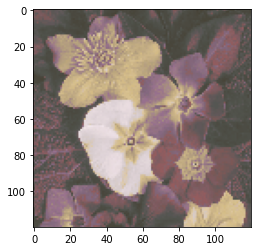

In [181]:
plt.imshow(compress_image_kmeans[0])

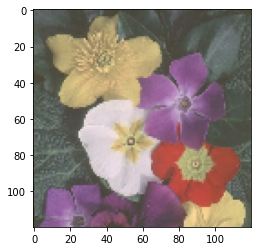

In [182]:
plt.imshow(img)

In [49]:
# wta
# image2 = image/255
learning_rate = 0.02
error_tolerance = 0.02
compress_image_wta = []
rmse_wta = []
# kset = [256, 128, 64, 32]
kset = [256]

for kk in kset:
    
    unsup = unsupervised_learning(X, kk)
    _,labels, centroids = unsup.wta(learning_rate,error_tolerance)
    
    com_image = new_image(m, n, labels, centroids)
    
    rmse = image_RMSE(img, com_image, m, n)
    
    compress_image_wta.append(com_image)
    rmse_wta.append(rmse)
    
    print('Finished {}'.format(kk),'error is {}'.format(rmse))

Number of samples : 14400 256
++++++ (256, 3)
winner take all clustering, run time is 417.6926 seconds
Finished 256 error is 6.518504642767218


6.518504642767218

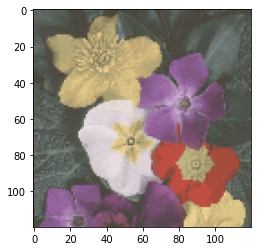

In [256]:
plt.imshow(compress_image_wta[0])
ax.axes.xaxis.set_visible(False)
ax.axes.yaxis.set_visible(False)

In [220]:
np.unique(com_image.reshape(14400, 3), axis = 0).size

270

9.2328369300978

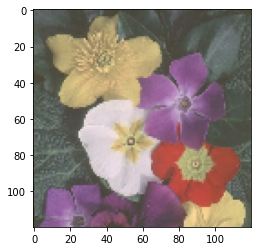

In [207]:
plt.imshow(img)
rmse

In [737]:
%matplotlib qt
fig, axs= plt.subplots(nrows = 8,ncols = 2)
axs = axs.flatten()


In [257]:
for dd in range(14,1,-1):
    print(dd)

14
13
12
11
10
9
8
7
6
5
4
3
2


In [53]:
from sklearn.cluster import KMeans

In [58]:
image = np.reshape(X, (rows * cols, 3))
# image = np.reshape(np_im, (3, -1)).T
image.shape

(14400, 3)

(14400,)
(120, 120)
17.222397400542768


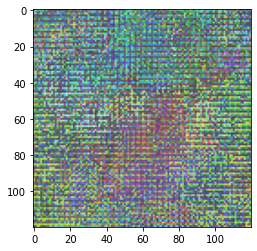

In [61]:
kMeans = KMeans(n_clusters = 500)
kMeans.fit(image)

# centers
centers = np.asarray(kMeans.cluster_centers_, dtype = np.uint8)
centers 


# labels 
labels = np.asarray(kMeans.labels_, dtype = np.uint8)
print(labels.shape)
labels = np.reshape(labels, (rows, cols))
print(labels.shape)
labels

# reconstructing
newImage = np.zeros((rows, cols, 3), dtype = np.uint8)
for i in range(rows):
    for j in range(cols):
            # assinging every pixel the rgb color of their label's center 
            newImage[i, j, :] = centers[labels[i, j], :]

error = image_RMSE(np_im, newImage, rows, cols)
plt.imshow(newImage)
print(error)

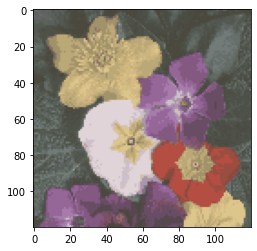

In [690]:
plt.imshow(np_im)